<a href="https://colab.research.google.com/github/jane-rusakova/python_for_hw_tasks/blob/main/HW_11_2_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%B7_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних

---


🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.

Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df = pd.read_csv('yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

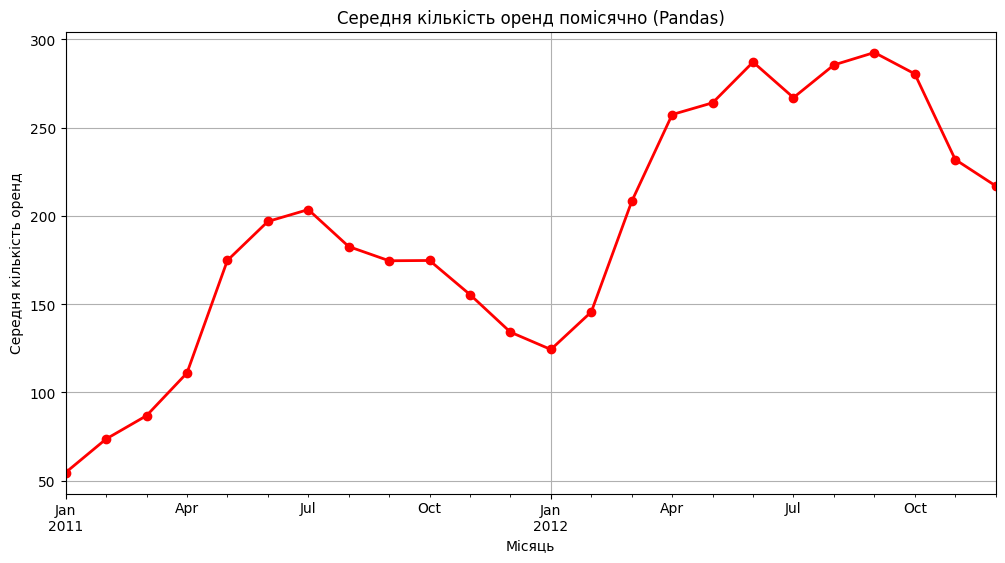

In [10]:
plt.figure(figsize=(12, 6))
monthly_mean.plot(
    marker="o",
    color="red",
    linewidth=2
)
plt.title("Середня кількість оренд помісячно (Pandas)")
plt.xlabel("Місяць")
plt.ylabel("Середня кількість оренд")
plt.grid(True)
plt.show()


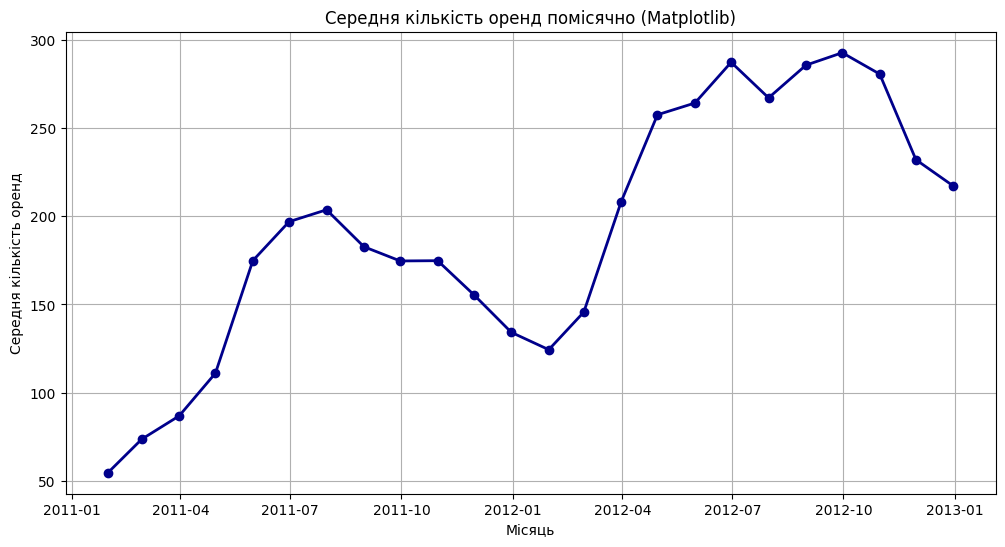

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(
    monthly_mean.index,
    monthly_mean.values,
    marker="o",
    color="darkblue",
    linewidth=2
)
plt.title("Середня кількість оренд помісячно (Matplotlib)")
plt.xlabel("Місяць")
plt.ylabel("Середня кількість оренд")
plt.grid(True)
plt.show()


Чим відрізняються два графіки?

Pandas автоматично використовує власний стиль
Matplotlib виглядає більш стримано та лаконічно.


У Pandas частіше автоматично форматуються дати на осі X.

У Matplotlib потрібно налаштовувати форматування вручну, для більш читабельного вигляду.

Pandas → ідеально для швидких графіків в один рядок.

Matplotlib → більше можливостей кастомізації: кольори, стилі ліній, маркери, шрифти.

Зараз мені більше подобаються графіки через Pandas, бо вони простіші і швидші у побудові, але менш гнучкі навідміну від Matplotlib
Думаю, коли потрібно буде застосувавати більше кастомізації, то звісно вибір буде за Matplotlib

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [11]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень1

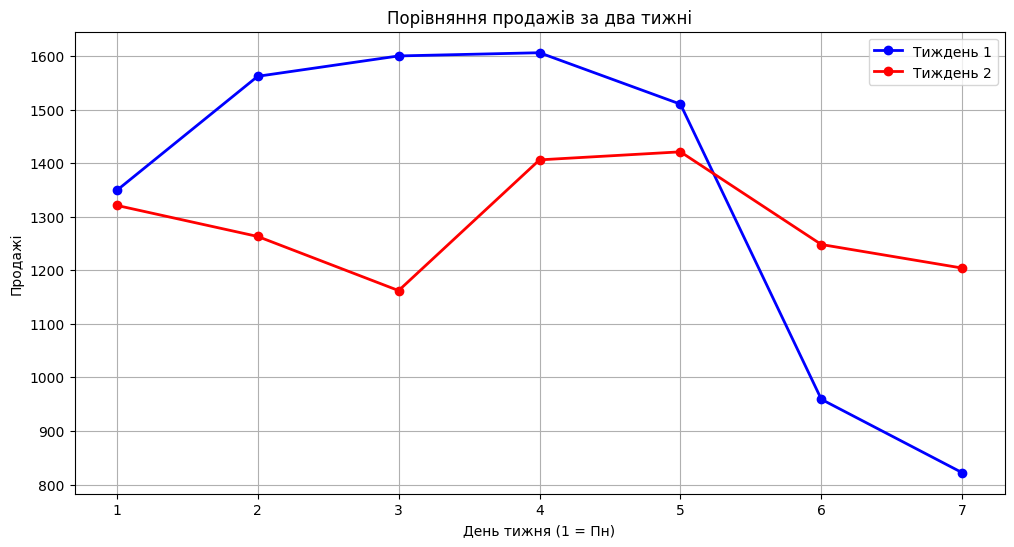

In [12]:
import matplotlib.pyplot as plt
import numpy as np

days = [1, 2, 3, 4, 5, 6, 7]
sales_week1 = [1349,1562,1600,1606,1510,959,822]
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]

plt.figure(figsize=(12,6))

# Лінія тиждень 1
plt.plot(days, sales_week1, marker="o", color="blue", label="Тиждень 1", linewidth=2)

# Лінія тиждень 2
plt.plot(days, sales_week2, marker="o", color="red", label="Тиждень 2", linewidth=2)

# Підписи
plt.title("Порівняння продажів за два тижні")
plt.xlabel("День тижня (1 = Пн)")
plt.ylabel("Продажі")
plt.legend()
plt.grid(True)

plt.xticks(days)  # показати всі дні 1–7
plt.show()


Тиждень 2 значно стабільніший, тому що:

Лінія продажів майже рівна, без різких спадів.

Продажі коливаються в межах приблизно 1160–1420.

На тижні 1 є сильні падіння (особливо у вихідні — 959 та 822).

In [13]:
range_week1 = max(sales_week1) - min(sales_week1)
range_week2 = max(sales_week2) - min(sales_week2)
range_week1, range_week2


(784, 259)

З обчислення бачимо, що менший розмах = стабільніші дані

Тому тиждень 2 стабільніший.

## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за кварталами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

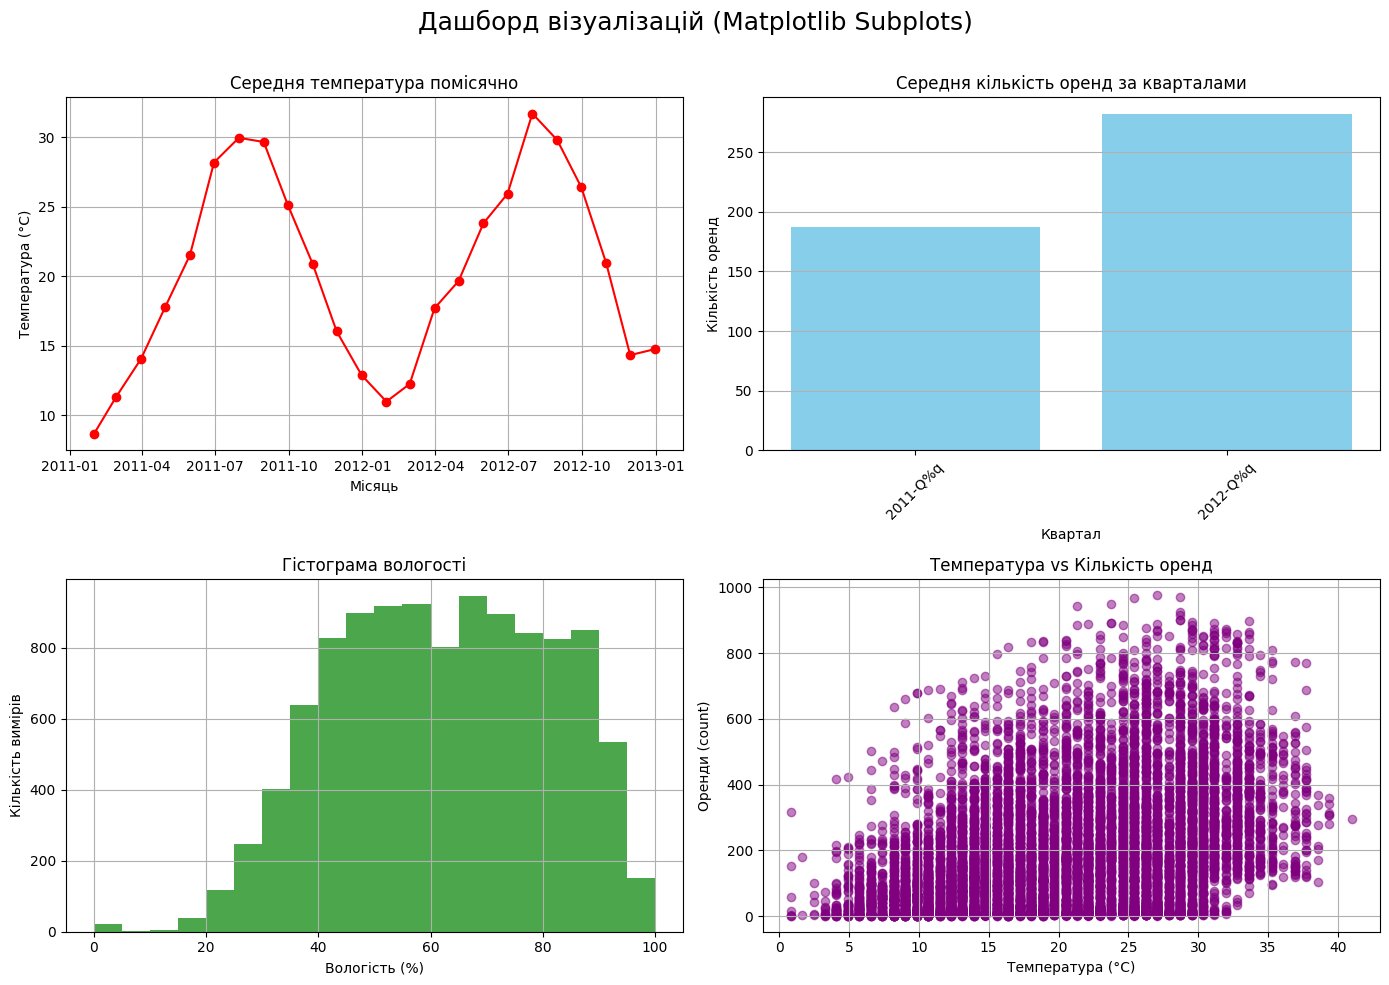

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv("yulu_rental.csv")
df["datetime"] = pd.to_datetime(df["datetime"])
df = df.set_index("datetime")

# --- ПІДГОТОВКА ДАНИХ ---

# 1. Середня температура помісячно
monthly_temp = df["temp"].resample("ME").mean()

# 2. Середня кількість оренд за кварталами
quarterly_rent = df["count"].resample("QE").mean()

# 3. Дані для гістограми вологості
humidity_data = df["humidity"]

# 4. Дані для scatter: температура vs оренди
temp = df["temp"]
rent = df["count"]

# --- ПОБУДОВА СУБПЛОТІВ ---

plt.figure(figsize=(14, 10))
plt.suptitle("Дашборд візуалізацій (Matplotlib Subplots)", fontsize=18)

# 1. Лінійний графік середньої температури
plt.subplot(2, 2, 1)
plt.plot(monthly_temp.index, monthly_temp.values, marker="o", color="red")
plt.title("Середня температура помісячно")
plt.xlabel("Місяць")
plt.ylabel("Температура (°C)")
plt.grid(True)

# 2. Bar plot середньої кількості оренд за кварталами
plt.subplot(2, 2, 2)
plt.bar(quarterly_rent.index.strftime("%Y-Q%q"), quarterly_rent.values, color="skyblue")
plt.title("Середня кількість оренд за кварталами")
plt.xlabel("Квартал")
plt.ylabel("Кількість оренд")
plt.xticks(rotation=45)
plt.grid(axis="y")

# 3. Гістограма вологості
plt.subplot(2, 2, 3)
plt.hist(humidity_data, bins=20, color="green", alpha=0.7)
plt.title("Гістограма вологості")
plt.xlabel("Вологість (%)")
plt.ylabel("Кількість вимірів")
plt.grid(True)

# 4. Scatter plot температура vs оренди
plt.subplot(2, 2, 4)
plt.scatter(temp, rent, alpha=0.5, color="purple")
plt.title("Температура vs Кількість оренд")
plt.xlabel("Температура (°C)")
plt.ylabel("Оренди (count)")
plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


1. Середня температура помісячно

Показує сезонну динаміку температури. Видно підйоми в літні місяці та спади взимку.

2. Середня кількість оренд за кварталами

Добре демонструє сезонність попиту: найвища активність у Q3, найнижча в Q1.

3. Гістограма вологості

Показує розподіл вологості в погодинних даних. Часто значення групуються у певних діапазонах.

4. Scatter temp vs count

Показує кореляцію між температурою та попитом:
В теплі дні більше оренд.

## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

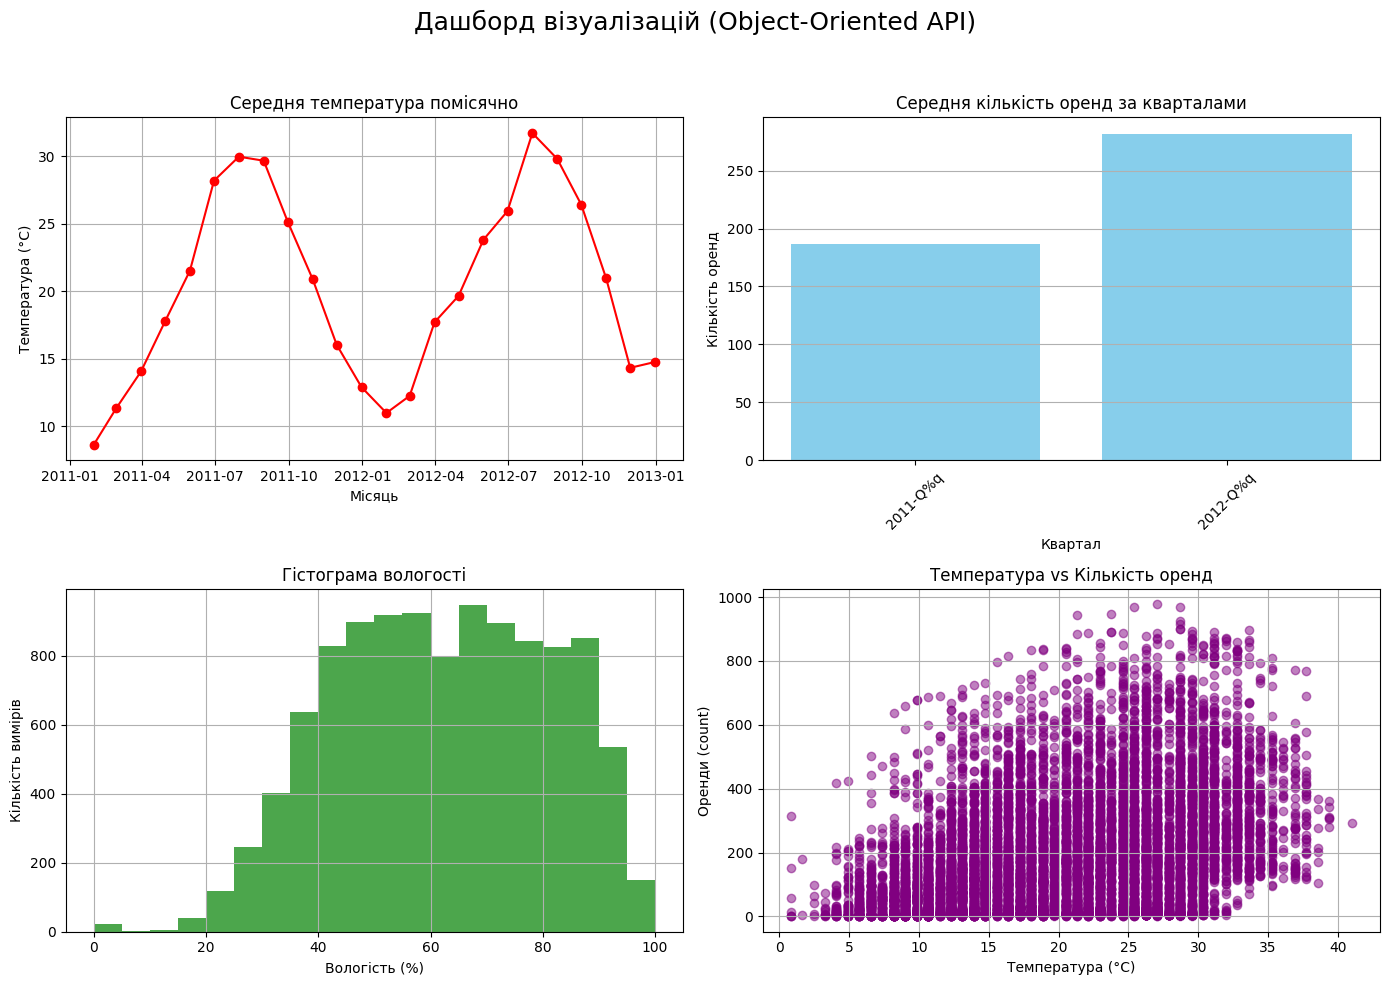

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv("yulu_rental.csv")
df["datetime"] = pd.to_datetime(df["datetime"])
df = df.set_index("datetime")

# --- Підготовка даних ---
monthly_temp = df["temp"].resample("ME").mean()
quarterly_rent = df["count"].resample("QE").mean()
humidity = df["humidity"]
temp = df["temp"]
rent = df["count"]

# --- Створення сітки 2x2 ---
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Дашборд візуалізацій (Object-Oriented API)", fontsize=18)

# 1. Лінійний графік середньої температури
ax[0, 0].plot(monthly_temp.index, monthly_temp.values, marker="o", color="red")
ax[0, 0].set_title("Середня температура помісячно")
ax[0, 0].set_xlabel("Місяць")
ax[0, 0].set_ylabel("Температура (°C)")
ax[0, 0].grid(True)

# 2. Bar plot середньої кількості оренд за кварталами
ax[0, 1].bar(quarterly_rent.index.strftime("%Y-Q%q"),
             quarterly_rent.values,
             color="skyblue")
ax[0, 1].set_title("Середня кількість оренд за кварталами")
ax[0, 1].set_xlabel("Квартал")
ax[0, 1].set_ylabel("Кількість оренд")
ax[0, 1].tick_params(axis='x', rotation=45)
ax[0, 1].grid(axis="y")

# 3. Гістограма вологості
ax[1, 0].hist(humidity, bins=20, color="green", alpha=0.7)
ax[1, 0].set_title("Гістограма вологості")
ax[1, 0].set_xlabel("Вологість (%)")
ax[1, 0].set_ylabel("Кількість вимірів")
ax[1, 0].grid(True)

# 4. Scatter plot температура vs кількість оренд
ax[1, 1].scatter(temp, rent, alpha=0.5, color="purple")
ax[1, 1].set_title("Температура vs Кількість оренд")
ax[1, 1].set_xlabel("Температура (°C)")
ax[1, 1].set_ylabel("Оренди (count)")
ax[1, 1].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


1. plt.subplot() — менш гнучкий і менш зручний при великій кількості графіків.

Не дозволяє легко зберігати й змінювати об’єкти осей.

Підходить для простих випадків.

2. plt.subplots() — дає повний контроль над кожним підграфіком.

Набагато зручніший для складних дашбордів, коли треба налаштовувати кожен графік окремо.


plt.subplot() переключає “активну” область малювання, а plt.subplots() створює набір осей, з якими можна працювати явно та незалежно.

## (Опціонально) Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

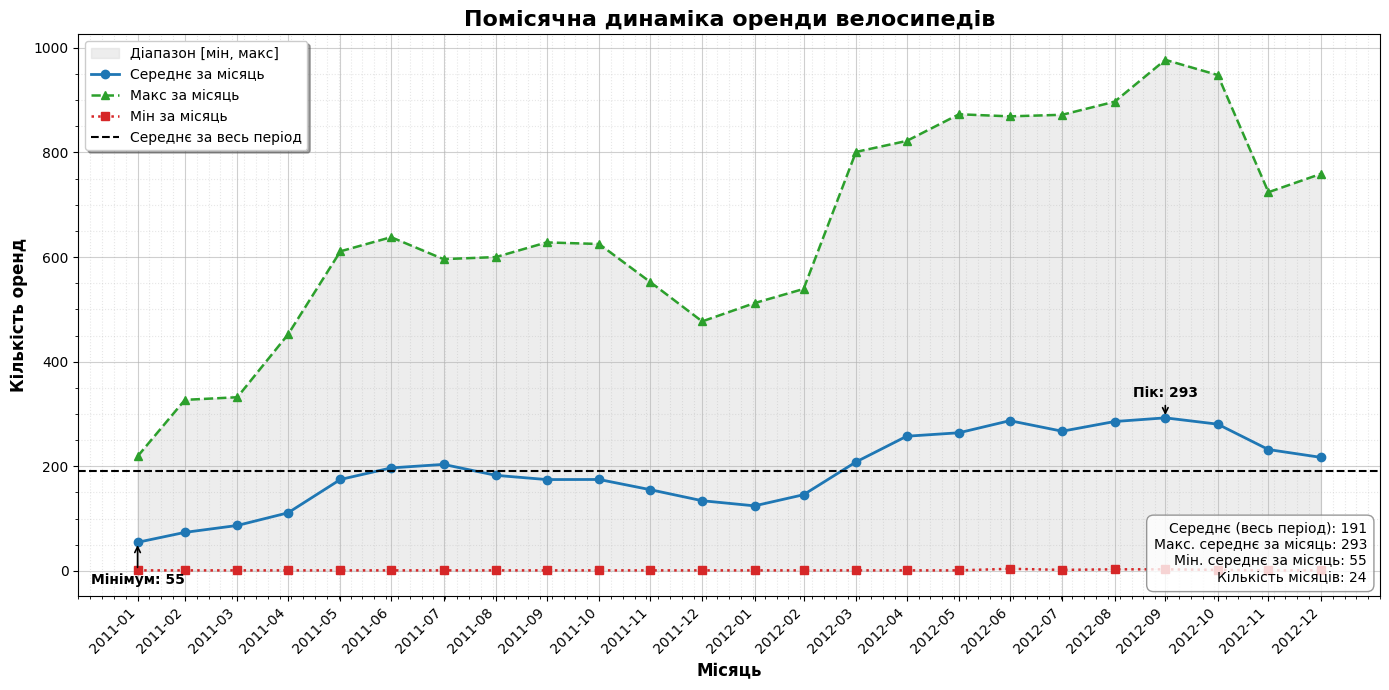

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Завантаження та підготовка даних
df = pd.read_csv("yulu_rental.csv")
df["datetime"] = pd.to_datetime(df["datetime"])
df = df.set_index("datetime")

# 2. Агрегація: помісячно мін / макс / середнє значення count
monthly_stats = df["count"].resample("ME").agg(["mean", "min", "max"])

# 3. Загальне середнє за весь період
overall_mean = monthly_stats["mean"].mean()

# 4. Пошук місяця з макс/мін середнім значенням
idx_max = monthly_stats["mean"].idxmax()
idx_min = monthly_stats["mean"].idxmin()
max_mean = monthly_stats.loc[idx_max, "mean"]
min_mean = monthly_stats.loc[idx_min, "mean"]

# 5. Створення фігури
fig, ax = plt.subplots(figsize=(14, 7))

# 6. Заливка діапазону [мін, макс]
ax.fill_between(
    monthly_stats.index,
    monthly_stats["min"],
    monthly_stats["max"],
    color="lightgray",
    alpha=0.4,
    label="Діапазон [мін, макс]"
)

# 7. Три лінії: середнє, мінімум, максимум
ax.plot(
    monthly_stats.index,
    monthly_stats["mean"],
    linestyle="-",
    marker="o",
    color="tab:blue",
    linewidth=2,
    label="Середнє за місяць"
)

ax.plot(
    monthly_stats.index,
    monthly_stats["max"],
    linestyle="--",
    marker="^",
    color="tab:green",
    linewidth=1.8,
    label="Макс за місяць"
)

ax.plot(
    monthly_stats.index,
    monthly_stats["min"],
    linestyle=":",
    marker="s",
    color="tab:red",
    linewidth=1.8,
    label="Мін за місяць"
)

# 8. Горизонтальна лінія загального середнього
ax.axhline(
    overall_mean,
    color="black",
    linestyle="--",
    linewidth=1.5,
    label="Середнє за весь період"
)

# 9. Анотації для найвищого та найнижчого середнього значення
ax.annotate(
    f"Пік: {max_mean:.0f}",
    xy=(idx_max, max_mean),
    xytext=(0, 15),
    textcoords="offset points",
    ha="center",
    fontsize=10,
    fontweight="bold",
    arrowprops=dict(arrowstyle="->", color="black", lw=1.2)
)

ax.annotate(
    f"Мінімум: {min_mean:.0f}",
    xy=(idx_min, min_mean),
    xytext=(0, -30),
    textcoords="offset points",
    ha="center",
    fontsize=10,
    fontweight="bold",
    arrowprops=dict(arrowstyle="->", color="black", lw=1.2)
)

# 10. Оформлення осей, сітки, тік-сетів

# Підписи осей з жирним шрифтом
ax.set_title(
    "Помісячна динаміка оренди велосипедів",
    fontsize=16,
    fontweight="bold"
)
ax.set_xlabel("Місяць", fontsize=12, fontweight="bold")
ax.set_ylabel("Кількість оренд", fontsize=12, fontweight="bold")

# Форматування міток по осі X (місяць-року)
ax.set_xticks(monthly_stats.index)
ax.set_xticklabels(
    monthly_stats.index.strftime("%Y-%m"),
    rotation=45,
    ha="right"
)

# Двошарова сітка: основна + допоміжна
ax.grid(True, which="major", linestyle="-", alpha=0.6)
ax.minorticks_on()
ax.grid(True, which="minor", linestyle=":", alpha=0.3)

# 11. Стилізована легенда з тінню
legend = ax.legend(
    loc="upper left",
    frameon=True,
    shadow=True,
    fontsize=10
)

# 12. Текстовий блок зі статистикою в кутку
text_str = (
    f"Середнє (весь період): {overall_mean:.0f}\n"
    f"Макс. середнє за місяць: {max_mean:.0f}\n"
    f"Мін. середнє за місяць: {min_mean:.0f}\n"
    f"Кількість місяців: {len(monthly_stats)}"
)

ax.text(
    0.99, 0.02, text_str,
    transform=ax.transAxes,
    fontsize=10,
    va="bottom",
    ha="right",
    bbox=dict(
        boxstyle="round,pad=0.5",
        facecolor="white",
        alpha=0.8,
        edgecolor="gray"
    )
)

plt.tight_layout()
plt.show()


1. Анотації допомагають:

виділити ключові точки (пік, мінімум, аномалії);
покращити інформативність, оскільки текстові пояснення роблять візуалізацію більш зрозумілою та самодостатньою;

2. fill_between():

створює заливку між двома кривими
наочно показує діапазон значень (наприклад, між мінімумом і максимумом);
робить графік більш виразним і професійним.

3. Текстовий блок:

додає миттєву статистичну довідку прямо на графіку (середнє, максимум, мінімум);
робить графік більш самодостатнім — його можна вставити в презентацію чи звіт без додаткових пояснень;